## ***Steps to Implement Logistic Regression***
 Read the data to identify the problem (Classification or Regression)
 Clean up the data (Check for outliers, NaN values)
 Set the Hypothesis (For logistic regression sigma(x) =1/(1+e^(-h[θ] (x))))
    ## h[θ](x) = sigma of i from 0->n(θ(i)*x(i)) where x = variable and n = number of data
 Calculate the loss using cost function
    ## Logistic regression cost function or log-loss or cross entropy :
       ### J(θ) = -(1/m)[sigma of i from 0->n(y[actual](i)*log(y[predicted](i))+(1-y[actual](i))*log(1 - y[predicted](i))))]
       #### y[predicted] = h[θ](x)
 Run the function (such as gradient desecnt) to get the minimum value of log-loss
    ## Repeat until convergence{
    ## θ(i) = θ(i) - alpha*(1/n)*[sigma (y[predicted](i)-y[actual](i))*x(i)]
    ## for i from 0->n
    ## }
        ### tolerance = 0.0001(or 10^-4)
Get the final weights for the best fit

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class Network(object):
  def backprop(self, x, y):
    """Return a tuple "(nabla_b, nabla_w)" representing the
    gradient for the cost function C_x.  "nabla_b" and
    "nabla_w" are layer-by-layer lists of numpy arrays, similar
    to "self.biases" and "self.weights"."""
    self.biases = np.random.randn(4).flatten()
    nabla_b = [np.zeros(b.shape) for b in self.biases]
    nabla_w = [np.zeros(w.shape) for w in self.weights]

    # feedforward
    activation = x
    activations = [x] # list to store all the activations, layer by layer
    zs = [] # list to store all the z vectors, layer by layer
    for b, w in zip(self.biases, self.weights):
        z = np.dot(w, activation)+b
        zs.append(z)
        activation = sigmoid(z)
        activations.append(activation)

    # backward pass
    delta = self.cost_derivative(activations[-1], y) * \
        sigmoid_prime(zs[-1])
    nabla_b[-1] = delta
    nabla_w[-1] = np.dot(delta, activations[-2].transpose())


    for l in xrange(2, self.num_layers):
        z = zs[-l]
        sp = sigmoid_prime(z)
        delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
        nabla_b[-l] = delta
        nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
    return (nabla_b, nabla_w)

  def sigmoid(self, z):
    ##Sigmoid Function
    return 1/(1.0+np.exp(-z))
  
  def sigmoid_prime(self, z):
    """First Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))
  
  def cost_derivative(self, output_activations, y):
    """Return the vector of partial derivatives \partial C_x /
    \partial a for the output activations."""
    return (output_activations-y)

In [ ]:
# Create Network Class object
network = Network()

In [ ]:
from google.colab import files
upload = files.upload()

Saving IRIS.csv to IRIS.csv


In [ ]:
import io
iris_data=pd.read_csv(io.BytesIO(upload['IRIS.csv']))
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print("Type of dataset",type(iris_data))
print("shape of dataset",iris_data.shape)

Type of dataset <class 'pandas.core.frame.DataFrame'>
shape of dataset (150, 5)


In [ ]:
# Find Nan value in the data set
iris_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_data_set = iris_data.copy()

In [ ]:
#Mapping Categorical values with Numerical Values
iris_data_set['species']=iris_data_set['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2});

In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data_set.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#Divide data into train and test
train=iris_data_set.sample(frac=0.8)
test=iris_data_set.drop(train.index)

In [ ]:
# Get the number of outcomes in target
(iris_data_set.iloc[:,-1]).unique()
# There are 3 classes.

array([0, 1, 2])

In [ ]:
# Keep Sample Train
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
113,5.7,2.5,5.0,2.0,2
90,5.5,2.6,4.4,1.2,1
87,6.3,2.3,4.4,1.3,1
94,5.6,2.7,4.2,1.3,1
42,4.4,3.2,1.3,0.2,0


In [ ]:
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [ ]:
test_x = test.iloc[:,:-1]
test_y = test.iloc[:,-1]
print(test_x.shape,test_y.shape)

(30, 4) (30,)


In [ ]:
# Since there are 3 classes, so need to follow multi classification model i.e ovr or ova (one vs rest or one vs all)
# Consider one class is 0 and another class is 5 i.e.(1+2).
# consider w as θ(weight).
# There are 4 features
# So, y = w1x1 + w2x2 + w3x3 + w4x4 + w0 where w0 is bias i.e. nothing but intercept of line
# Cost function and Gradient
# Gradient desecent algo is independent from hypothesis function. So as like linear regression, it can be implemented for logistic regression
def get_cost_gradient(w,x,y):
  # As per matrix multiplication rule : AB not = BA so wx not = xw and column of first matrix must be = row of secord matrix
  z = np.dot(w,np.transpose(x)) # it will return pd.series for each index
  # Probability of class or y_estimate
  y_estimate = network.sigmoid(z) # it will return pd.series for each index
  error = (y_estimate - y) # it will return pd.series for each index
  loss = -(1/len(x)) * (np.log(y_estimate).dot(y)+np.log(1-y_estimate).dot(1-y)) # e^y=x == [y = (logx base e)]
  # get the gradient value to minimize the loss
  # gradient = θj−α(∂(J(θ))/∂θj) where α : learning rate
  # After computing the derivatives the last equation will be :
  # ∂J(θ)/∂θj=(1/m)(∑(i=1 to m))(hθ(x(i))−y(i))x(i)j = (1/m)(∑(i=1 to m))((y_estimated - y_actual)*x)
  # return derivative value of loss and new weights will calculated on calling function
  # hθ(x) = 1/1+e^(-(θ^T)(x))
  gradient = (1.0/len(x))*(error.dot(x))
  return gradient, loss

In [ ]:
# repeat until convergence {θj}:=θj−α∂∂θjJ(θ)
# As need to initialize weights randomly to get best weight(θ) for hypothesis
def executeOptimize(train_x, train_y):
  np.random.seed(0)
  w=np.random.randn(4)
  alpha = 0.01 # α : learning rate 
  tolerance = 1e-3  # param for stopping the loop
  print("Intial values of Weights:",w[3], w[2], w[1], w[0])
  # Perform Gradient Descent
  iterations = 1
  while True:
    gradient, error = get_cost_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient
    print ("Iteration: %d - Error: %.4f" %(iterations, error))
    # Break on Converg condition
    if np.sum(abs(new_w - w)) < tolerance:
      print ("Converged")
      break
    # Print error every 10 iterations
    if iterations % 10 == 0:
      print ("Iteration: %d - Error: %.4f" %(iterations, error))
      print ("Tol" ,np.sum(abs(new_w - w)))
      print ("Updated Weights : {:f} , {:f}, {:f} , {:f}".format(w[3], w[2], w[1], w[0]))
    iterations += 1
    w = new_w
    
  print ("Final Weights : {:f} , {:f}, {:f} , {:f}".format(w[3], w[2], w[1], w[0]))
  return w

In [ ]:
def plotG(x,y):
  columns=len(x.columns)
  col = 0
  while (col<columns):
    plt.scatter(x.iloc[:,col],y,c='b')
    plt.xlabel(x.columns.values[col])
    plt.ylabel('species')
    plt.show()
    col=col+1

In [ ]:
# For ovr, take 2 classes in 1 group and another in separate group and get the weights for each iteration
#def fit_ovr():
#  y = train['species']
#  for g in np.unique(y):
#    y_onevsrest = np.where(y==g,0,1)
train_group1=train.copy()
# first set 0 as 0 and others 1
train_group1['species']=train_group1['species'].map({0:1,1:0,2:0});

train_group2=train.copy()
# second set 1 as 0 and others 1
train_group2['species']=train_group2['species'].map({0:0,1:1,2:0});

train_group3=train.copy()
# third set 2 as 0 and others 1
train_group3['species']=train_group3['species'].map({0:0,1:0,2:1});

In [ ]:
# Features or label : except species column
# Target variable : species
# Divide data into features and target
# train_x = train.iloc[:,:-1]
# train_y = train.iloc[:,-1]

# print(len(train_x),len(train_y))
weightsList = []
train_group1_x = train_group1.iloc[:,:-1]
train_group1_y = train_group1.iloc[:,-1]
weightsList.append(executeOptimize(train_group1_x,train_group1_y))

Intial values of Weights: 2.240893199201458 0.9787379841057392 0.4001572083672233 1.764052345967664
Iteration: 1 - Error: 14.1748
Iteration: 2 - Error: 13.8302
Iteration: 3 - Error: 13.4857
Iteration: 4 - Error: 13.1412
Iteration: 5 - Error: 12.7966
Iteration: 6 - Error: 12.4521
Iteration: 7 - Error: 12.1076
Iteration: 8 - Error: 11.7630
Iteration: 9 - Error: 11.4185
Iteration: 10 - Error: 11.0740
Iteration: 10 - Error: 11.0740
Tol 0.1071127712500963
Updated Weights : 2.135968 , 0.677464, 0.225410 , 1.380957
Iteration: 11 - Error: 10.7295
Iteration: 12 - Error: 10.3850
Iteration: 13 - Error: 10.0405
Iteration: 14 - Error: 9.6960
Iteration: 15 - Error: 9.3516
Iteration: 16 - Error: 9.0072
Iteration: 17 - Error: 8.6628
Iteration: 18 - Error: 8.3185
Iteration: 19 - Error: 7.9744
Iteration: 20 - Error: 7.6303
Iteration: 20 - Error: 7.6303
Tol 0.1070167985828604
Updated Weights : 2.019391 , 0.342752, 0.031327 , 0.955413
Iteration: 21 - Error: 7.2865
Iteration: 22 - Error: 6.9430
Iteration: 

In [ ]:
train_group2_x = train_group2.iloc[:,:-1]
train_group2_y = train_group2.iloc[:,-1]
weightsList.append(executeOptimize(train_group2_x,train_group2_y))

Intial values of Weights: 2.240893199201458 0.9787379841057392 0.4001572083672233 1.764052345967664
Iteration: 1 - Error: 12.3862
Iteration: 2 - Error: 12.1017
Iteration: 3 - Error: 11.8172
Iteration: 4 - Error: 11.5327
Iteration: 5 - Error: 11.2482
Iteration: 6 - Error: 10.9637
Iteration: 7 - Error: 10.6792
Iteration: 8 - Error: 10.3948
Iteration: 9 - Error: 10.1103
Iteration: 10 - Error: 9.8258
Iteration: 10 - Error: 9.8258
Tol 0.09635486649520611
Updated Weights : 2.165593 , 0.752389, 0.199835 , 1.398807
Iteration: 11 - Error: 9.5413
Iteration: 12 - Error: 9.2569
Iteration: 13 - Error: 8.9724
Iteration: 14 - Error: 8.6880
Iteration: 15 - Error: 8.4036
Iteration: 16 - Error: 8.1192
Iteration: 17 - Error: 7.8348
Iteration: 18 - Error: 7.5505
Iteration: 19 - Error: 7.2663
Iteration: 20 - Error: 6.9822
Iteration: 20 - Error: 6.9822
Tol 0.09628116083176023
Updated Weights : 2.081931 , 0.500919, -0.022680 , 0.993073
Iteration: 21 - Error: 6.6982
Iteration: 22 - Error: 6.4145
Iteration: 23

In [ ]:
train_group3_x = train_group3.iloc[:,:-1]
train_group3_y = train_group3.iloc[:,-1]
weightsList.append(executeOptimize(train_group3_x,train_group3_y))

Intial values of Weights: 2.240893199201458 0.9787379841057392 0.4001572083672233 1.764052345967664
Iteration: 1 - Error: 9.7605
Iteration: 2 - Error: 9.5667
Iteration: 3 - Error: 9.3728
Iteration: 4 - Error: 9.1790
Iteration: 5 - Error: 8.9852
Iteration: 6 - Error: 8.7913
Iteration: 7 - Error: 8.5975
Iteration: 8 - Error: 8.4037
Iteration: 9 - Error: 8.2099
Iteration: 10 - Error: 8.0160
Iteration: 10 - Error: 8.0160
Tol 0.07720607800460585
Updated Weights : 2.196868 , 0.818014, 0.222635 , 1.451456
Iteration: 11 - Error: 7.8222
Iteration: 12 - Error: 7.6284
Iteration: 13 - Error: 7.4346
Iteration: 14 - Error: 7.2408
Iteration: 15 - Error: 7.0470
Iteration: 16 - Error: 6.8532
Iteration: 17 - Error: 6.6594
Iteration: 18 - Error: 6.4657
Iteration: 19 - Error: 6.2719
Iteration: 20 - Error: 6.0782
Iteration: 20 - Error: 6.0782
Tol 0.07717769915729705
Updated Weights : 2.147954 , 0.639445, 0.025417 , 1.104169
Iteration: 21 - Error: 5.8846
Iteration: 22 - Error: 5.6910
Iteration: 23 - Error: 

In [ ]:
print(weightsList)

[sepal_length    0.515189
sepal_width     0.945882
petal_length   -2.329425
petal_width     0.798291
Name: species, dtype: float64, sepal_length    0.298973
sepal_width    -0.838717
petal_length   -0.434836
petal_width     1.229874
Name: species, dtype: float64, sepal_length   -0.963181
sepal_width    -1.221822
petal_length    1.030996
petal_width     2.797811
Name: species, dtype: float64]


In [ ]:
plotG(train_group1_x,train_group1_y)

In [ ]:
plotG(train_group2_x,train_group2_y)

In [ ]:
plotG(train_group3_x,train_group3_y)

In [ ]:
def calculateProbability(w, x):
  z = np.dot(w,x)
  return network.sigmoid(z)

In [ ]:
# Calculate probability for each group
# record will be mapped with value of highest probability group
# 1st group : 
w = np.array(weightsList[0].values)
p1 = np.transpose(calculateProbability(w, np.transpose(test_x)))

In [ ]:
# 2nd group : 
w = np.array(weightsList[1].values)
p2 = np.transpose(calculateProbability(w, np.transpose(test_x)))

In [ ]:
# 3rd group : 
w = np.array(weightsList[2].values)
p3 = np.transpose(calculateProbability(w, np.transpose(test_x)))

In [ ]:
p = np.vstack((p1,p2,p3))

In [ ]:
# Get the highest probability
y_predict = np.argmax(p,axis=0) # get the index of max value
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 2])

### Import SKLearn Library to validate the results using confusion matrix and other validation checks

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score, roc_auc_score,roc_curve,auc

Testing accuracy

In [ ]:
results = confusion_matrix(test_y,y_predict)
print(results)

[[11  0  0]
 [ 0  9  4]
 [ 0  0  6]]


In [ ]:
acc_score = accuracy_score(test_y,y_predict)
print(acc_score)

0.8666666666666667


In [ ]:
prec_score = precision_score(test_y,y_predict,average='micro')
print(prec_score)

0.8666666666666667


In [ ]:
rec_score=recall_score(test_y,y_predict,average='micro')
print(rec_score)

0.8666666666666667


Training accuracy

In [ ]:
w = np.array(weightsList[0].values)
p1 = np.transpose(calculateProbability(w, np.transpose(train_group1_x)))

w = np.array(weightsList[1].values)
p2 = np.transpose(calculateProbability(w, np.transpose(train_group2_x)))

w = np.array(weightsList[2].values)
p3 = np.transpose(calculateProbability(w, np.transpose(train_group3_x)))

train_p = np.vstack((p1,p2,p3))

train_predict = np.argmax(train_p,axis=0) # get the index of max value
train_predict

train_y = train.iloc[:,-1]
train_acc_score = accuracy_score(train_y,train_predict)
print(train_acc_score)

0.8833333333333333


# **AUC**
Curve area under the graph between the True Positive Rate (Senstivity or Precision) and False Positive Rate (1- Specificity).


Senstivity = TP/(TP+FN)

Specificity = TN/(TN+FP)

False Negative Rate = 1 - Specificity = FP/(TN+FP)

SKLearn ROC-AUC don't support multiclassification problem.currently there is no way to plot a ROC curve for multi-class classification problems as it is defined only for binary class classification.

In [126]:
def funRocAuc(y_test, y_pred):
  fpr=dict()
  tpr=dict()
  threshold=dict()
  roc_auc=dict()
  n_classes=np.unique(y_pred)
  for i in n_classes:
    #y_actual=np.where(y_test==i,y_test,i+len(np.unique(y_test)))
    y_actual=np.where(y_test==i,y_test,-1)
    y_calculated=np.where(y_pred==i,y_pred,-1)
    fpr[i], tpr[i], threshold[i]=roc_curve(y_true=y_actual,y_score=y_calculated,pos_label=i)
    print("fpr_tpr",fpr[i],tpr[i])
    roc_auc[i]=auc(fpr[i],tpr[i])
    print("roc_auc",roc_auc[i])
  colors = (['blue', 'red', 'green'])

  for i, color in zip(range(len(n_classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()

Error : **y_true takes value in {0, 3} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.** , is telling that if class is not between 0 to 1 or -1 to 1 then specify the pos_label which tells that which label is the positive one and, if not given explicitly (like in your case here), it assumes the default value of 1.

fpr_tpr [0. 0. 1.] [0. 1. 1.]
roc_auc 1.0
fpr_tpr [0. 0. 1.] [0.         0.69230769 1.        ]
roc_auc 0.8461538461538461
fpr_tpr [0.         0.16666667 1.        ] [0. 1. 1.]
roc_auc 0.9166666666666667


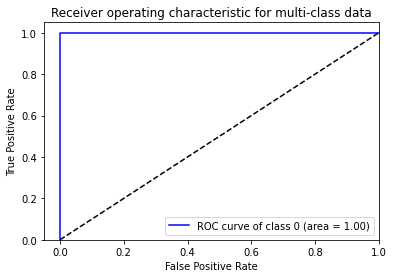

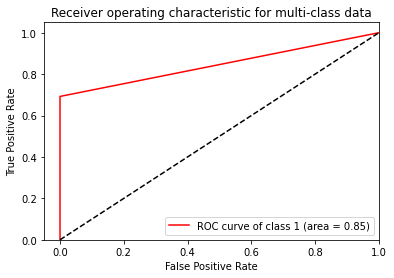

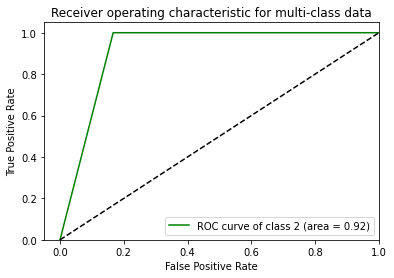

In [127]:
funRocAuc(test_y,y_predict)